# Correlations
__Author__: Tejas Bhakta

In this Notebook, we will fetch gun violence and mental health data from our csv files using pandas, and using statisical tests we will conclude if Mental Heath Illnesses affects Gun Violence

In [5]:
import pandas
import plotly
import plotly.plotly as py
import locale
from locale import atof
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [68]:
def gunshot_data_fetch():
    """
    Uses pandas to fetch gunshot data from our gunshot.csv
    """
    
    import pandas as pd
    us_state_abbrev = {
        'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO',
        'Connecticut': 'CT','Delaware': 'DE','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID',
        'Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA',
        'Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN',
        'Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV',
        'New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC',
        'North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Rhode Island': 'RI',
        'South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT',
        'Virginia': 'VA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'
    }
    
    
    gun_df = pd.read_csv('../data/gunshot.csv')
    gun_df.insert(loc=0, column='code', value=[us_state_abbrev[i] for i in gun_df['State']])

    return gun_df

In [193]:
def mental_data_fetch(file_path):
    """
    Uses pandas to fetch the mental health data at a specific file_path (we have 2 mental health data file, one with totals,
    one with %'s by state')
    :param filepath, str, path where the mental health data.csv we want is stored. 
    return: pandas table
    """
    
    import pandas as pd
    
    mental_df = pd.read_csv(file_path)
    # mental_df.insert(loc=0, column='code', value=[us_state_abbrev[i] for i in mental_df['State']])
    # we don't need this line since the csv already has the codes

    return mental_df

In [55]:
gunshot_data_fetch()

,code,State,"Firearm deaths per 100,000 people",Poverty rate,Permit required to carry handgun,Violent crime rate,Total firearm deaths 2016
0,MS,Mississippi,19.8,20.8%,No,280.5,587
1,OK,Oklahoma,19.6,16.3%,Yes,449.8,766
2,DE,Delaware,10.9,11.7%,Yes,508.8,111
3,MN,Minnesota,7.6,9.9%,Yes,242.6,432
4,AK,Alaska,23.0,9.9%,No,804.2,177
5,IL,Illinois,11.6,13.0%,FOID,436.3,1490
6,AR,Arkansas,17.7,17.2%,Yes,550.9,541
7,NM,New Mexico,18.2,19.8%,Yes,702.5,383
8,OH,Ohio,12.9,14.6%,Yes,300.3,1524
9,IN,Indiana,14.9,14.1%,Yes,404.7,997


In [172]:
def mapPlot(df, item):
    '''
    Generate a heatmap over the American map.
    
    :@prama df: pandas.core.frame.DataFrame, input data.
    :@param item: string, the column of the data that need to be plot.
    :@return res: plotly.tools.PlotlyDisplay, the heatmap.
    '''

    assert isinstance(df, pandas.core.frame.DataFrame), 'The input data is not a DataFrame.'
    assert isinstance(item, str), 'The input item is not a string.'
    
    
    for col in df.columns:
        df[col] = df[col].astype(str)

    scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
                [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]
    


    try:
        data = [ dict(
                type='choropleth',
                colorscale = scl,
                autocolorscale = False,
                locations = df['code'],
                z = df[item].astype(float),
                locationmode = 'USA-states',
                marker = dict(line = dict ( color = 'rgb(255,255,255)',
                                            width = 2 ) ) ) 
               ]
    except:
        raise ValueError,'Cannot convert the data in require column.'

    layout = dict(
            title = '2016 US {}'.format(item),
            geo = dict(
                scope='usa',
                projection=dict( type='albers usa' ),
                showlakes = True,
                lakecolor = 'rgb(255, 255, 255)'),
                 )

    fig = dict( data=data, layout=layout )
    res = py.iplot( fig, filename='d3-cloropleth-map' )
    assert isinstance(res,plotly.tools.PlotlyDisplay)
    return res

In [190]:
import locale
import pandas as pd
def mental_to_float():
    """
    Function to convert the totals mental health by state data to float, since the commas in the numbers messed stuff up
    """
    ### read data
    df_mh = pd.read_csv('../data/mental_health.csv')
    df_mh

    # way to change string with comma to float
    locale.setlocale(locale.LC_NUMERIC, '') 

    ### generate new mental health data frame
    df_mh_1 = df_mh[[[i for i in df_mh][1]]]
    df_mh_2 = df_mh[[i for i in df_mh][2:-1]].applymap(atof)### change string with comma to float
    df_mh_3 = df_mh[[[i for i in df_mh][-1]]]

    df_mh_new = pd.concat([df_mh_1,df_mh_2,df_mh_3],axis=1) ### merge
    return df_mh_new
    

In [192]:
mental_to_float()

,code,Serious Mental Illness,Any Mental Illness,Received Mental Health Services,Had Serious Thoughts of Suicide,Major Depressive Episode,State
0,AL,156.0,680.0,478.0,132.0,245.0,Alabama
1,AK,24.0,105.0,71.0,27.0,39.0,Alaska
2,AZ,208.0,902.0,611.0,206.0,310.0,Arizona
3,AR,121.0,468.0,346.0,100.0,181.0,Arkansas
4,CA,1068.0,5072.0,3427.0,1173.0,1786.0,California
5,CO,191.0,832.0,658.0,203.0,316.0,Colorado
6,CT,100.0,500.0,473.0,104.0,190.0,Connecticut
7,DE,31.0,129.0,110.0,32.0,48.0,Delaware
8,FL,570.0,2769.0,2039.0,535.0,979.0,Florida
9,GA,315.0,1341.0,909.0,298.0,508.0,Georgia


In [191]:
mental_data_fetch('../data/mental_health_percentage.csv')
#no commas in numbers here, just dealing with percent values that are in float already


,Unnamed: 0,code,Serious Mental Illness,Any Mental Illness,Received Mental Health Services,Had Serious Thoughts of Suicide,Major Depressive Episode,State
0,0,AL,4.23,18.47,12.98,3.57,6.66,Alabama
1,1,AK,4.53,20.01,13.54,5.15,7.39,Alaska
2,2,AZ,4.04,17.52,11.87,4.01,6.03,Arizona
3,3,AR,5.45,21.02,15.54,4.47,8.13,Arkansas
4,4,CA,3.61,17.15,11.59,3.96,6.04,California
5,5,CO,4.61,20.05,15.86,4.88,7.62,Colorado
6,6,CT,3.59,18.00,17.05,3.76,6.84,Connecticut
7,7,DE,4.23,17.71,15.06,4.35,6.52,Delaware
8,9,FL,3.56,17.30,12.75,3.34,6.12,Florida
9,10,GA,4.17,17.74,12.03,3.94,6.72,Georgia


In [175]:
import pandas

def alphabetize(gun_df, gun_item):
    """
    Puts gun_df[gun_item] in alphabetical order by State for our correlation test, 
    and returns it as a list that is in alphabetical order by respective state. 
    """
    gun = list(gun_df[gun_item])
    gun_state_order = list(gun_df['State'])
    gun, gun_state_order = zip(*sorted(zip(gun_state_order, gun)))

    return gun_state_order
    
                

# Statistical Analysis
In the following cells we will plot scatter plots for 2 sets of data, and print the correlation coefficient (r) and the t-value

- Correlation Coefficient: a number between −1 and +1 calculated so as to represent the linear dependence of two variables or sets of data. 
- t-value: The ratio of the departure of the estimated value of a parameter from its hypothesized value to its standard error. 

# Null Hypothesis
- Our Null Hypothesis: Mental Illness in each state DOES NOT affect gun related violences in each state
    - The hypothesis that there is no significant difference between specified populations, any observed difference being due to sampling or experimental error.

# Assumptions
In order to use the Pearson correlation test and t-test , we can safely assume ([t-test Assumptions](https://www.investopedia.com/ask/answers/073115/what-assumptions-are-made-when-conducting-ttest.asp#ixzz5H7bBuuhF)):

- Approximate Normality in gun violence occurrence and mental health by the Law of Large Numbers since we have huge population sizes 
    - [Law of Large Numbers](https://www.britannica.com/science/law-of-large-numbers)
    - [Law of Large Numbers Diagram](https://en.wikipedia.org/wiki/Law_of_large_numbers#/media/File:Lawoflargenumbers.svg)
- Large Outliers are rare
    - The data being used has been chosen from the middle ten measurements from a total of thirty, which would minimize large outliers in gain readings.
- Large Sample Size used
- Homogeneity of variance. Homogeneous, or equal, variance exists when the standard deviations of samples are approximately equal. 



In [180]:
def correlation(gun_df, mental_df, gun_item, mental_item):
    """
    Correlates 2 sets of pandas data columns, columns are specified by gun_item and mental_item
    and plots a scatterplot of the 2 columns
    """
    import scipy
    from scipy.stats import pearsonr
    import matplotlib.pyplot as plt
    import matplotlib
    assert isinstance(gun_item,str)
    assert isinstance(mental_item, str)
    
    #gun = gun_df[gun_item].astype(float)
    mental = mental_df[mental_item]
    #no need to use astype since our function converted all the values to float with function nmental_to_float

    #gun is not in alphabetical order
    #mental is in alphabetical order
    alph_gun = alphabetize(gun_df, gun_item)
    
    x = list(alph_gun)
    y = list(mental)
    
    
    plt.scatter(x,y)
    plt.xlabel(gun_item)
    plt.ylabel(mental_item)
    plt.show()

    #stores the correlation coef. and the t-value in a tuple
    coef = pearsonr(x, y)
    
    
    print ('The correlation coefficient (r) is: ', coef[0])
    if(coef[0]>=0.5):
        print ('%s and %s are strongly correlated') %(gun_item, mental_item)
    elif(coef[0]>=0.25):
        print ('%s and %s are moderately correlated') %(gun_item, mental_item)
    elif(coef[0]<0.3):
        print ('%s and %s are loosely/not correlated') %(gun_item, mental_item)
      
    
    print
    
    
    print ('The t-value is ', coef[1])
    
    if(coef[1] < .003):
        print('Since the t-value is less than 0.003, we can reject the null hypothesis,') 
        print('and say that %s affects %s with 99.7%% confidence') %(mental_item, gun_item)
        
    elif(coef[1] < .05):
        print('Since the t-value is less than 0.05, we can reject the null hypothesis,') 
        print('and say that %s affects %s with 95%% confidence') %(mental_item, gun_item)
    elif(coef[1] < .1):
        print('Since the t-value is less than 0.1, we can reject the null hypothesis,') 
        print('and say that %s affects %s with 90%% confidence') %(mental_item, gun_item)
    else:
        print('Our t-value is too high to accurately reject the null hypothesis')

# Statistics Crash Course

- __Correlation Coefficient (r)__: a bigger number implies a greater correlation. Numbers close to 0 indicate a lesser correlation
    - Positive means as x increases, so does y. Greater than 0.5 implies a strong correlation 
    - Negative means as x increases, y decreases. Less than -0.5 impilies a strong correlation
    
- __t-value__: bigger number is bad, we want a number as small as possible. Less than .05 is ideal, so we can reject the null hypothesis with 95% confidence

- __Null Hypthesis__: The test of significance is designed to assess the strength of the evidence against the null hypothesis. Usually, the null hypothesis is a statement of 'no effect' or 'no difference'.

# Note
- Total Mental Illness data is in thousands, for people 18 and over

# Total Firearm Deaths and Total Mental Illnesses by State

- We have very strong data that implies mental illnesses and firearm related deaths are strongly correlated, as seen by the 2 cells below

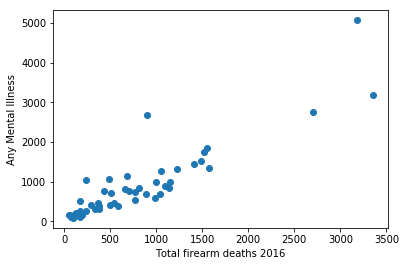

('The correlation coefficient (r) is: ', 0.8972545264973096)
Total firearm deaths 2016 and Any Mental Illness are strongly correlated

('The t-value is ', 1.1518122866060069e-18)
Since the t-value is less than 0.003, we can reject the null hypothesis,
and say that Any Mental Illness affects Total firearm deaths 2016 with 99.7% confidence


In [181]:
correlation(gunshot_data_fetch(), mental_to_float(), 
            'Total firearm deaths 2016', 'Any Mental Illness')

# This scatter plot compares total firearm death per state in 2016 with total number of mental illnesses in each state


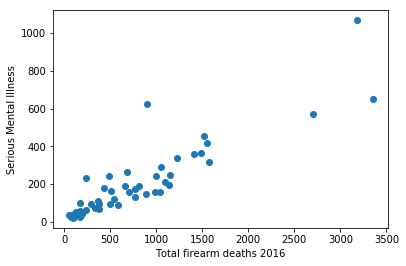

('The correlation coefficient (r) is: ', 0.8910691348066346)
Total firearm deaths 2016 and Serious Mental Illness are strongly correlated

('The t-value is ', 4.360343149067674e-18)
Since the t-value is less than 0.003, we can reject the null hypothesis,
and say that Serious Mental Illness affects Total firearm deaths 2016 with 99.7% confidence


In [182]:
correlation(gunshot_data_fetch(), mental_to_float(), 
            'Total firearm deaths 2016', 'Serious Mental Illness')

# This scatter plot compares total firearm death per state in 2016 with total number of serious mental illnesses in each state

# Firearm deaths per 100,000 and % people with mental illness by State
- Our data shows that on a per capita scale, firearm death (per 100,000) and mental illness are moderately correlated

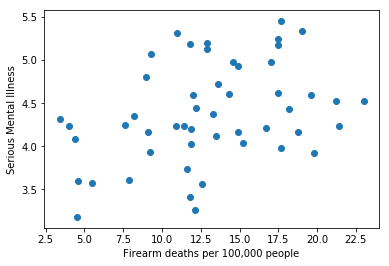

('The correlation coefficient (r) is: ', 0.36922325430296526)
Firearm deaths per 100,000 people and Serious Mental Illness are moderately correlated

('The t-value is ', 0.008321868169912552)
Since the t-value is less than 0.05, we can reject the null hypothesis,
and say that Serious Mental Illness affects Firearm deaths per 100,000 people with 95% confidence


In [183]:

correlation(gunshot_data_fetch(), mental_data_fetch('../data/mental_health_percentage.csv'), 
            'Firearm deaths per 100,000 people', 'Serious Mental Illness')

# This scatter plot compares Firearm deaths per 100,000 in each state with % of people with a Serious Mental Illness in each state

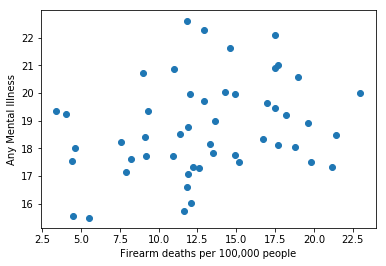

('The correlation coefficient (r) is: ', 0.2813376414972463)
Firearm deaths per 100,000 people and Any Mental Illness are moderately correlated

('The t-value is ', 0.04779141367611338)
Since the t-value is less than 0.05, we can reject the null hypothesis,
and say that Any Mental Illness affects Firearm deaths per 100,000 people with 95% confidence


In [184]:
correlation(gunshot_data_fetch(), mental_data_fetch('../data/mental_health_percentage.csv'), 
            'Firearm deaths per 100,000 people', 'Any Mental Illness')
# This scatter plot compares Firearm deaths per 100,000 in each state with % of people with Any Mental Illness in each state

# Violent Crime Rate and % Mental illnesses by State
- Our data shows Violent Crime Rates in each state and % of people with Any/Serious Mental Illness in each State are not correlated, and randomly distributed

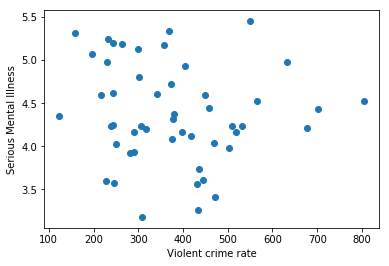

('The correlation coefficient (r) is: ', -0.10812041823287616)
Violent crime rate and Serious Mental Illness are loosely/not correlated

('The t-value is ', 0.45483133743481197)
Our t-value is too high to accurately reject the null hypothesis


In [185]:
correlation(gunshot_data_fetch(), mental_data_fetch('../data/mental_health_percentage.csv'), 
            'Violent crime rate', 'Serious Mental Illness')
# This scatter plot compares Violent crime rate in each state with % of people with a Serious Mental Illness in each state

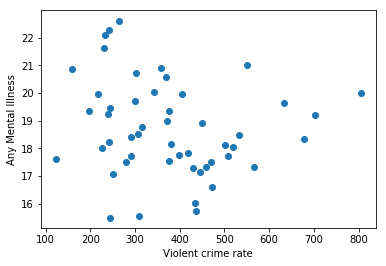

('The correlation coefficient (r) is: ', -0.1556480195823616)
Violent crime rate and Any Mental Illness are loosely/not correlated

('The t-value is ', 0.2804294200111309)
Our t-value is too high to accurately reject the null hypothesis


In [186]:
correlation(gunshot_data_fetch(), mental_data_fetch('../data/mental_health_percentage.csv'), 
            'Violent crime rate', 'Any Mental Illness')
# This scatter plot compares Violent crime rate in each state with % of people with Any Mental Illness in each state

# Violent Crime Rate and Mental Illness totals by State
- Our data shows Violent Crime Rates in each state and totals of people with Any/Serious Mental Illness in each State are not correlated, and is randomly distributed
- Note: Do not be fooled by the "bell" shape of this distribution. The "bell" shape of this does NOT imply a non-random distribuition, this is a scatterplot


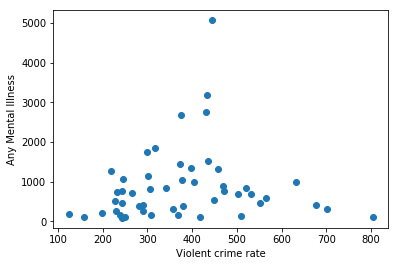

('The correlation coefficient (r) is: ', 0.0941649333886821)
Violent crime rate and Any Mental Illness are loosely/not correlated

('The t-value is ', 0.5153995431103486)
Our t-value is too high to accurately reject the null hypothesis


In [187]:
correlation(gunshot_data_fetch(), mental_to_float(), 
            'Violent crime rate', 'Any Mental Illness')
# This scatter plot compares Violent crime rate in each state with total number of people with Any Mental Illness in each state

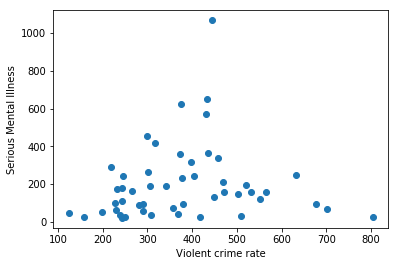

('The correlation coefficient (r) is: ', 0.09717408234581487)
Violent crime rate and Serious Mental Illness are loosely/not correlated

('The t-value is ', 0.5020060666868891)
Our t-value is too high to accurately reject the null hypothesis


In [188]:
correlation(gunshot_data_fetch(), mental_to_float(), 
            'Violent crime rate', 'Serious Mental Illness')
# This scatter plot compares Violent crime rate in each state with total number of people with Serious Mental Illness in each state

# Try it with other data from our tables
Use this format to compare gun violence with % mental illnesses in each state:

__correlation(gunshot_data_fetch(), mental_data_fetch('../data/mental_health_percentage.csv'),
            'Gun column name', 'Mental Column name')__
            
Use this format to compare gun violence with totals of mental illnesses in each state:

__correlation(gunshot_data_fetch(), mental_to_float(),
            'Gun column name', 'Mental Column name')__

# Conclusion
- Our strongest data is the correlation between Total Mental Illness/Total Serious Mental Illness and Total Gun Fatalities in each state
    - With a correlation of .89, these data sets have a very strong correlation
    - Our t-test values are very strong as well, and __we are able to conclude total Mental Illnesses in a State affect Total Gun Fatalities with 99.7% confidence __
    
- Violent Crimes in each State include rape, assault, gun violence, etc. Violent Crimes in each State and Mental Illness are not correlated
    - This further __strengthens our claim__ that total Mental Illnesses in a State affect Total Gun Fatalities because gun violence is a subset of this broader dataset